In [249]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from config import *
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import numpy as np
import seaborn as sns
from datetime import datetime

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [250]:
# Set the news list
targets = ['BBC', 'CBS', 'CNN', 'FoxNews', 'nytimes', 'NPR']

In [251]:
total_mood = []

for target in targets:
    
    last_tweet = None
    
    tweet_counter = 1
    
    for x in range(5):
        
        all_data = api.user_timeline(target, count=20, max_id=last_tweet, page=x)
        
        for tweet in all_data:
            
            emotions = analyzer.polarity_scores(tweet['text'])
            
            total_mood.append({'user': target,
                             'compound': emotions['compound'],
                             'positive': emotions['pos'],
                             'negative': emotions['neg'],
                             'neutral': emotions['neu'],
                             'tweets_ago': tweet_counter,
                             'text': tweet['text'],
                             'time': tweet['created_at'],
                              'likes': tweet['favorite_count'],
                              'RT': tweet['retweet_count']})
            
            tweet_counter += 1

        last_tweet = tweet["id"] - 1
    
tweet['created_at']

'Fri Mar 30 18:35:32 +0000 2018'

'Mon Apr 02 20:02:08 +0000 2018'

In [294]:
startDate

datetime.datetime(2018, 1, 30, 0, 0)

In [252]:
df = pd.DataFrame(total_mood)
df.head(10)

,RT,compound,likes,negative,neutral,positive,text,time,tweets_ago,user
0,14,0.0000,90,0.000,1.000,0.000,Delve into the world of @agathachristie with B...,Mon Apr 02 20:02:08 +0000 2018,1,BBC
1,10,0.0000,15,0.000,1.000,0.000,When this woman visited an uninhabited Caribbe...,Mon Apr 02 19:23:07 +0000 2018,2,BBC
2,20,0.1531,50,0.000,0.897,0.103,"In a revealing and emotional journey, @LennyHe...",Mon Apr 02 19:02:04 +0000 2018,3,BBC
3,42,0.5423,144,0.000,0.837,0.163,A fictionalised account of how Dave Allen beca...,Mon Apr 02 18:45:06 +0000 2018,4,BBC
4,16,0.0000,57,0.000,1.000,0.000,Would you try a blue cheese and pear ice cream...,Mon Apr 02 17:08:03 +0000 2018,5,BBC
5,3803,-0.5574,0,0.184,0.816,0.000,RT @BBCBreaking: South African anti-apartheid ...,Mon Apr 02 14:14:17 +0000 2018,6,BBC
6,15,0.4215,36,0.000,0.859,0.141,Is it easier to be a businesswoman in the West...,Mon Apr 02 13:32:07 +0000 2018,7,BBC
7,148,0.0000,0,0.000,1.000,0.000,RT @BBCWorld: Hill Street Blues creator Steven...,Mon Apr 02 11:58:06 +0000 2018,8,BBC
8,27,0.2235,120,0.000,0.894,0.106,"""I have cerebral palsy. But that won't stop me...",Mon Apr 02 11:07:00 +0000 2018,9,BBC
9,11,0.0000,43,0.000,1.000,0.000,From Easter egg nest cakes to hot cross buns: ...,Mon Apr 02 10:02:06 +0000 2018,10,BBC


In [299]:
df['time'].min()

'Fri Feb 02 17:23:18 +0000 2018'

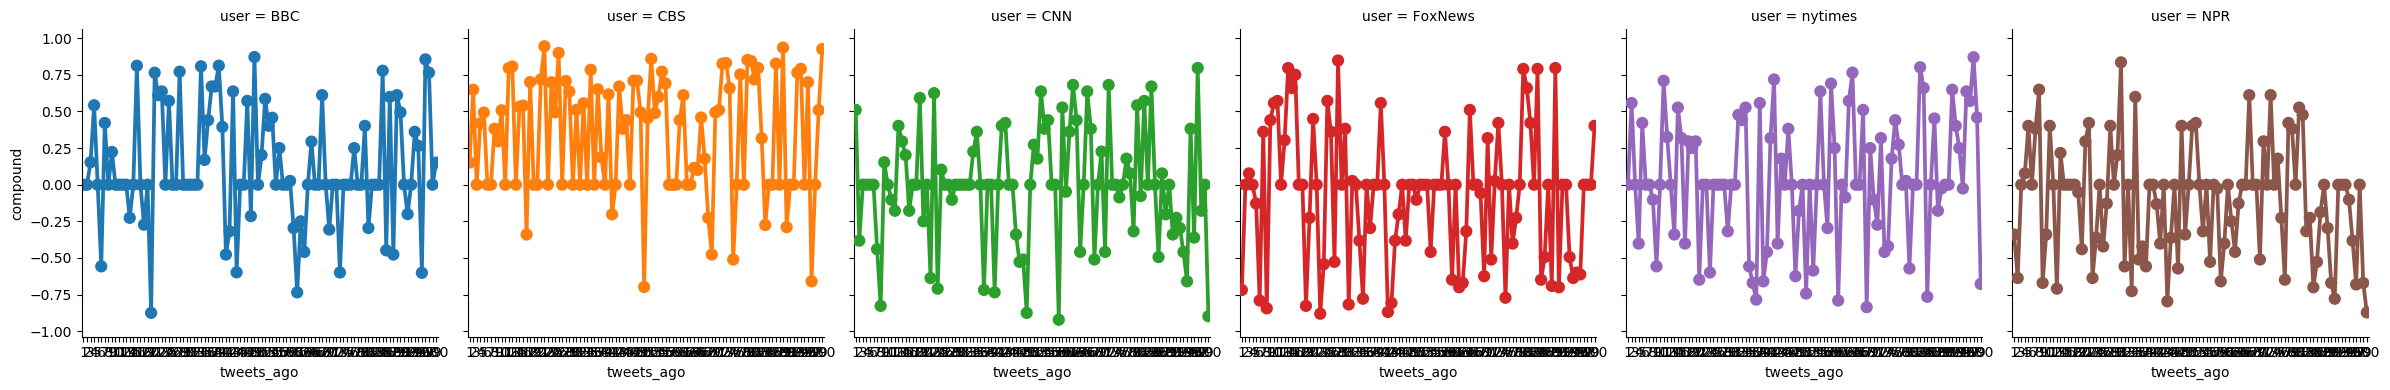

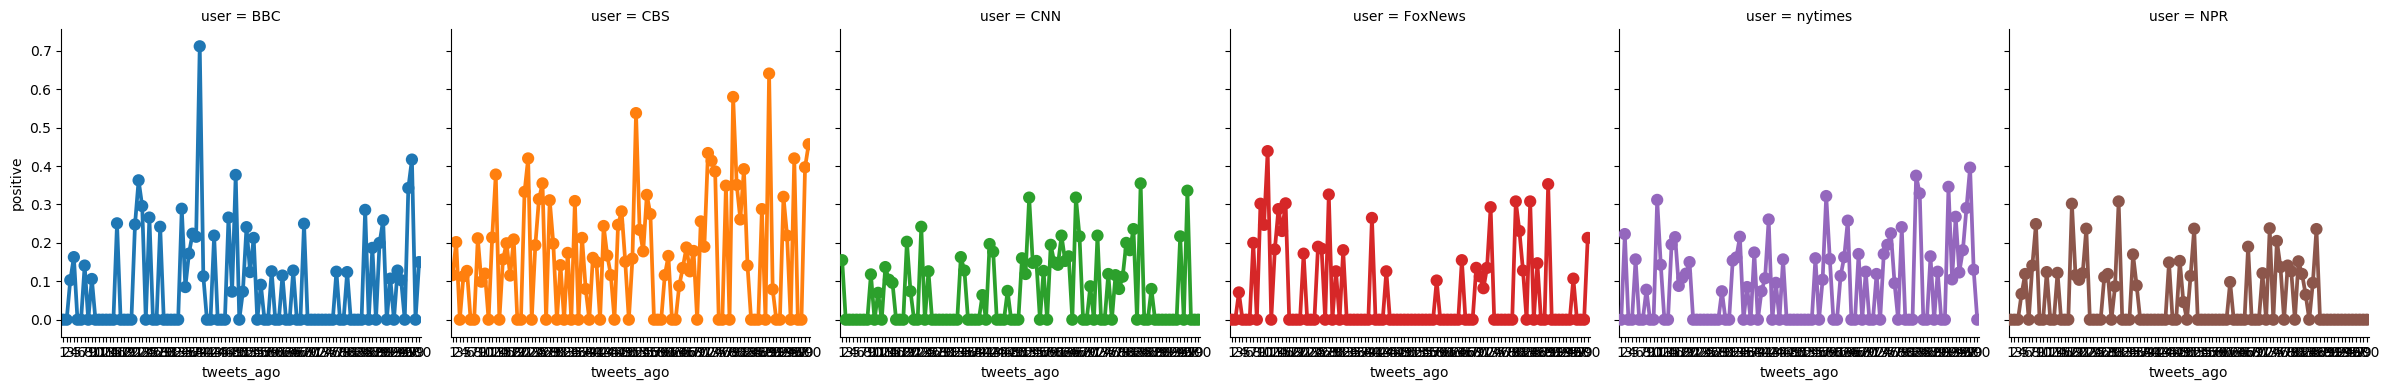

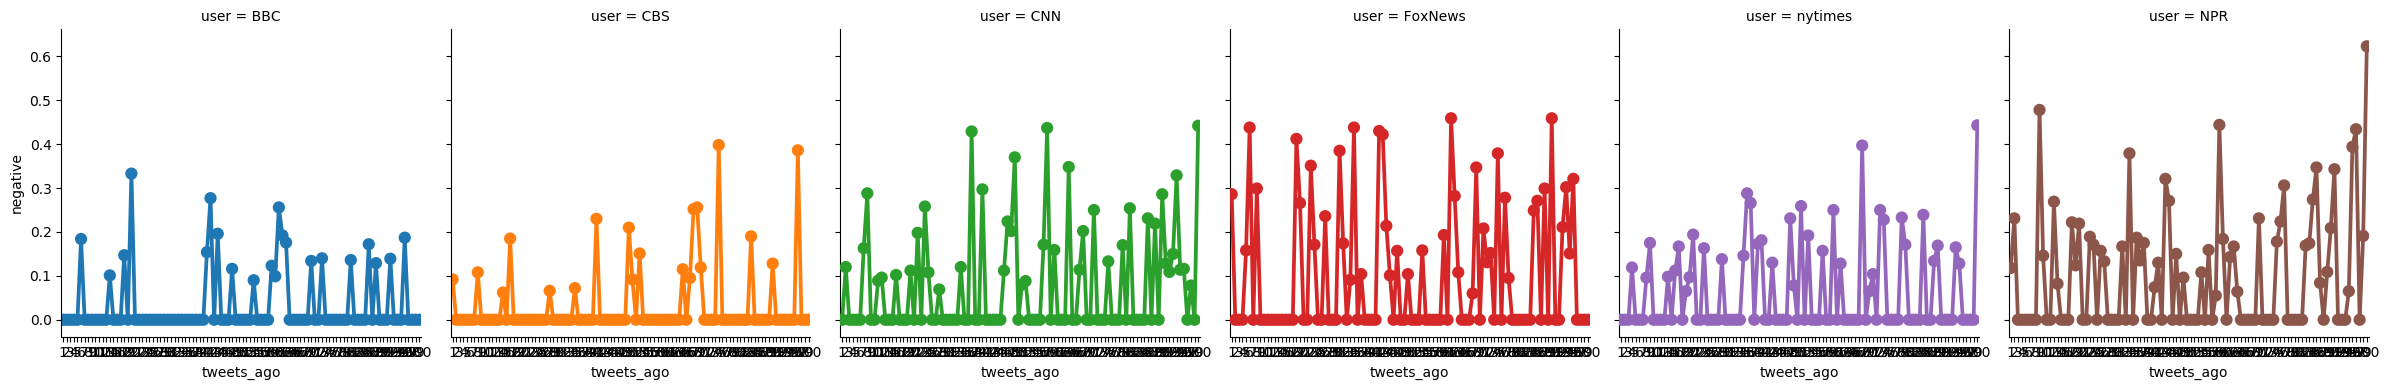

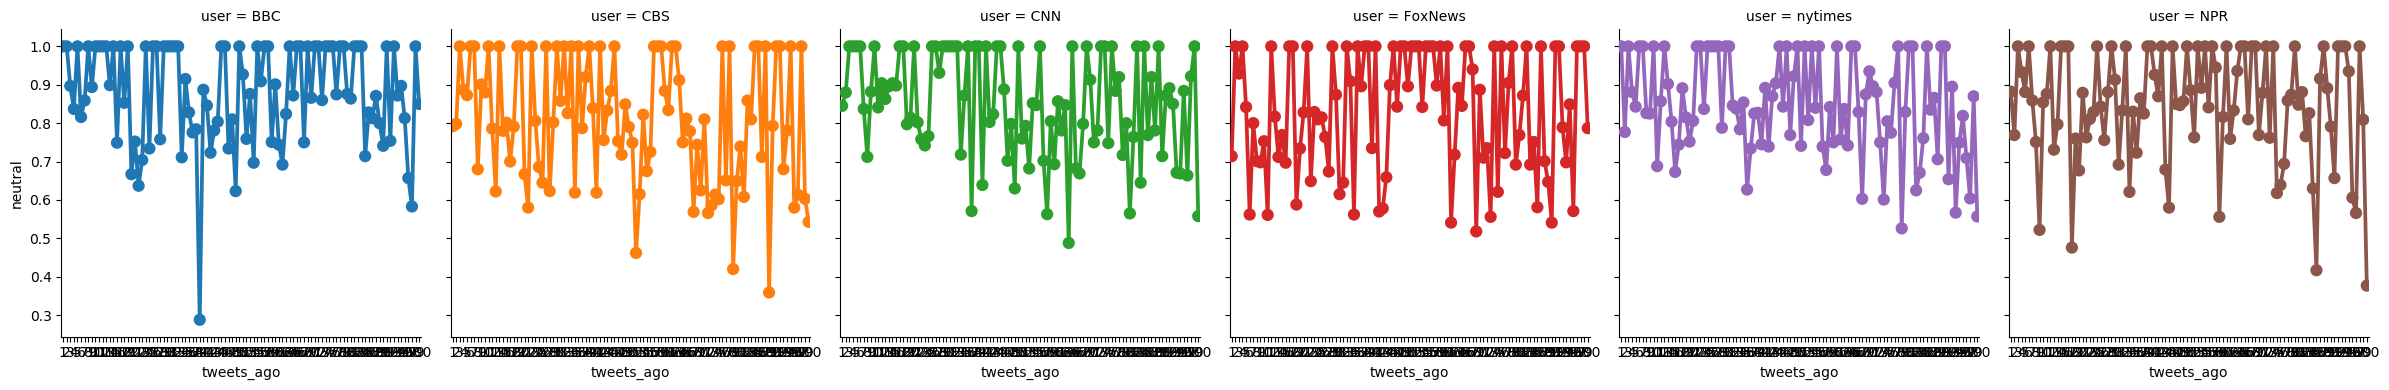

In [289]:
# Look at each news source separately
plt.rcParams.update(plt.rcParamsDefault) # Set default plot style
sentilist = ['compound', 'positive', 'negative', 'neutral']
for i in range(len(sentilist)):
    sns.factorplot(data=df, x="tweets_ago", y=sentilist[i], col="user", hue='user')

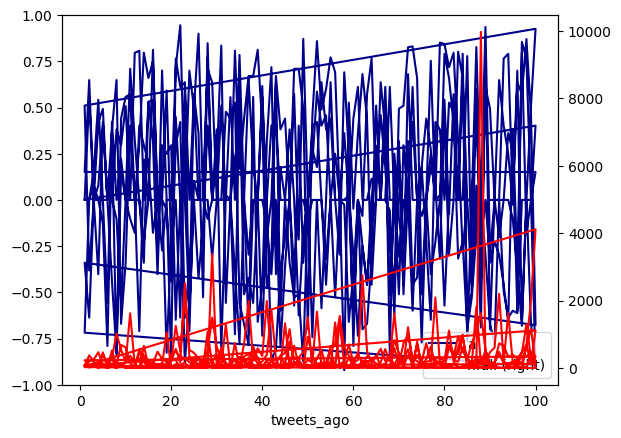

In [268]:
ax=df.plot(kind='line', x='tweets_ago', y='compound', ylim=[-1,1], color='DarkBlue', style='-', label='a')
df.plot(kind='line', x='tweets_ago', y='likes', secondary_y=True, color='Red', style='-', label='hfall', ax=ax)

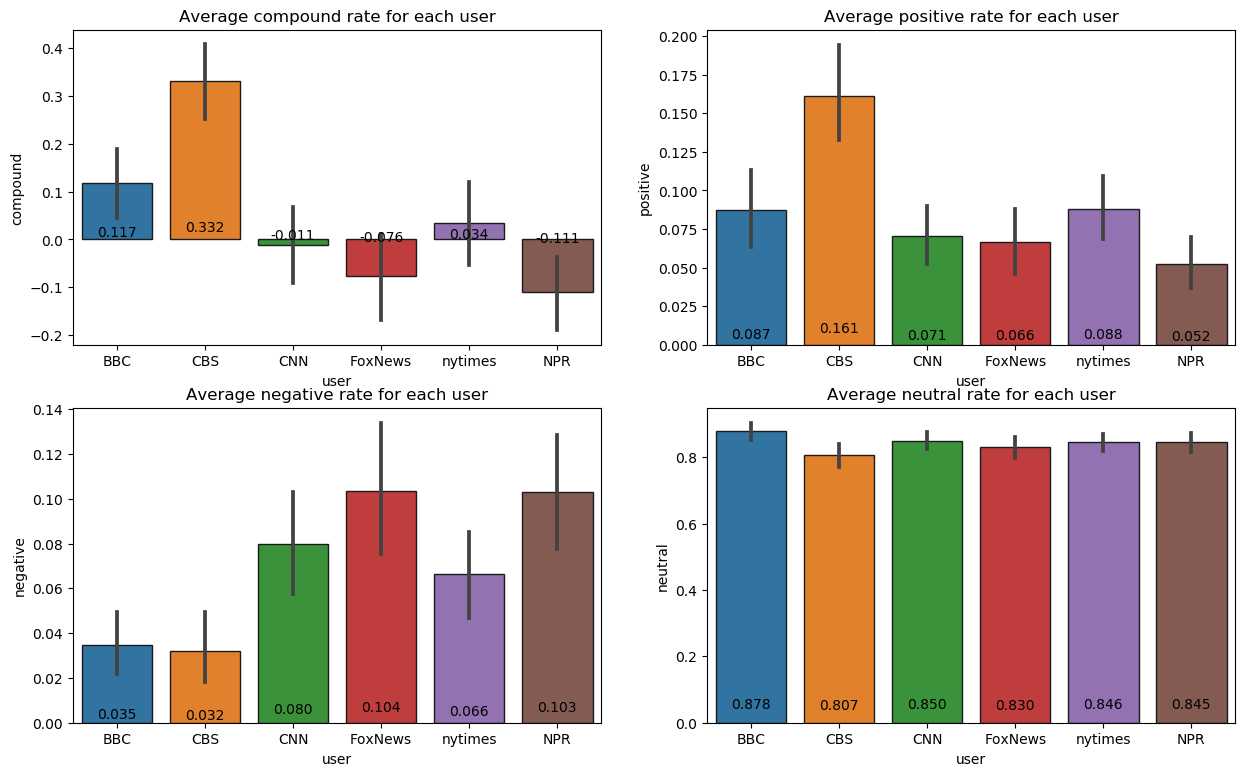

In [288]:
# Create barplots to look closely at each sentiment
plt.figure(figsize=(15,9))
for x in range(len(sentilist)):
    plt.subplot(2,2,x+1)
    ax = sns.barplot('user', sentilist[x], data=df, linewidth=1, edgecolor=".1")
    ax.set_title(f'Average {sentilist[x]} rate for each user')
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., p.get_height()*0.05, '{:1.3f}'.format(p.get_height()), ha="center")


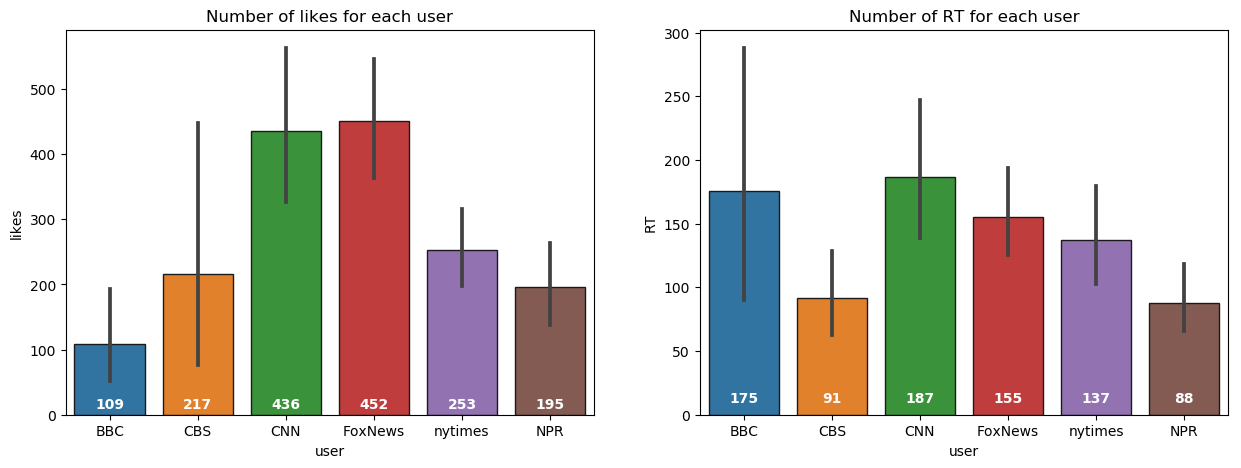

In [285]:
newlist = ['likes', 'RT']
plt.figure(figsize=(15,5))
for x in range(len(newlist)):
    plt.subplot(1,2,x+1)
    ax = sns.barplot('user', newlist[x], data=df, linewidth=1, edgecolor=".1")
    ax.set_title(f'Number of {newlist[x]} for each user')
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2., 10, '{:1.0f}'.format(p.get_height()), ha="center", color='w', weight='bold')
        


In [301]:
datedf = df.copy()
datedf.groupby(['time'])

In [300]:
x_lim = (df['time'].min, df['time'].max)
cnn, = plt.plot(x_lim, )

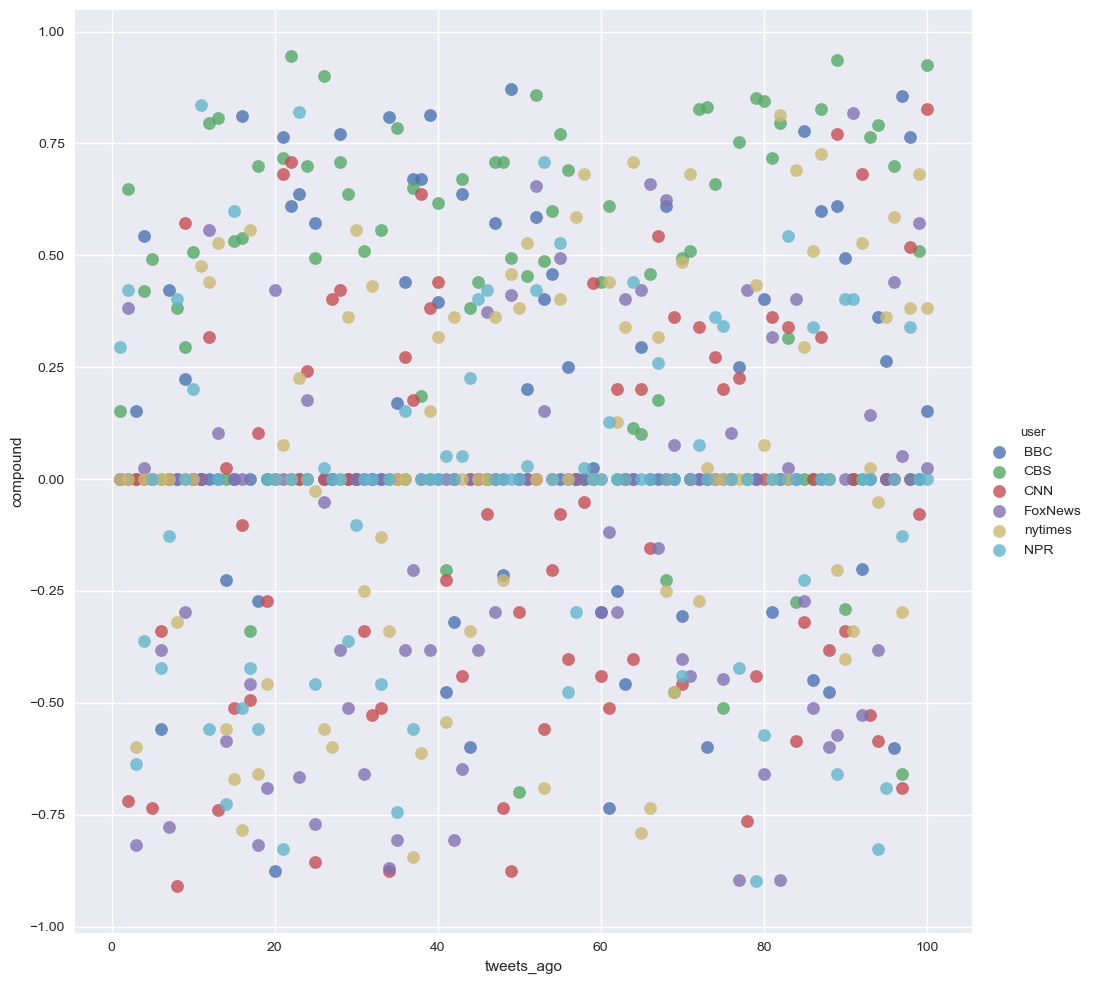

In [246]:
# Colored dots, what can be better?
sns.set()
sns.lmplot(x='tweets_ago', y='compound', data=df, hue="user", fit_reg=False, scatter=True, size=10,
           scatter_kws={"s":85})

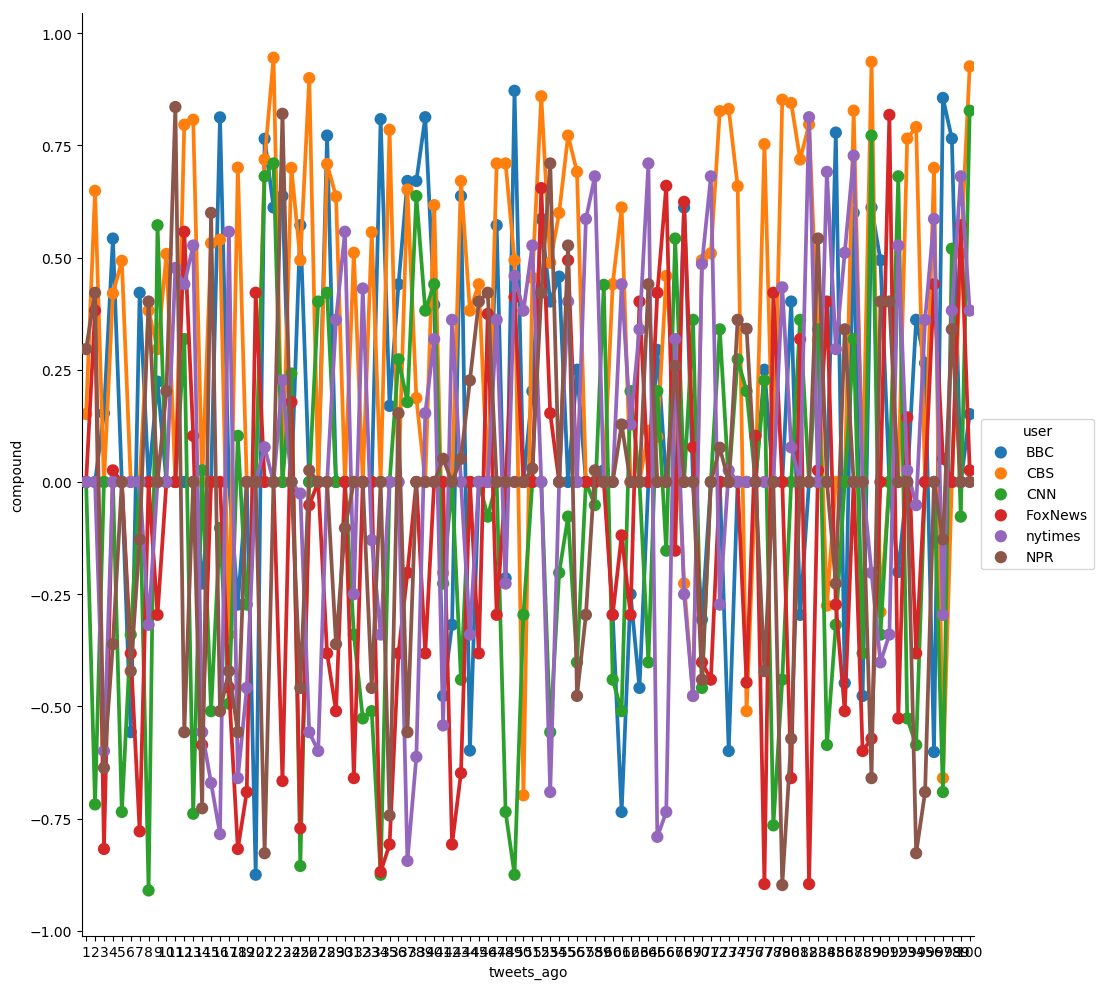

In [248]:
# What a wonderful plot, just can't erase it
plt.rcParams.update(plt.rcParamsDefault)
sns.factorplot(data=df, x="tweets_ago", y="compound", size=10, hue='user')